In [1]:
import pandas as pd
import numpy as np
import os, glob
import datetime
import matplotlib.pyplot as plt

prgname = 'gpsrsrp_multilines_pci_snglebox_dtewise.ipynb'

In [2]:
path = "/local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/gps_cell_mergedata/SP_Kishore/"
all_files = glob.glob(os.path.join(path, "gps_cell*.csv"))
print(len(all_files))
nfls = len(all_files)

71


In [3]:
#pick the voluteer name
name2 = all_files[0].split("/")[-2]
name = name2.split("_")[-1]
print(name)

Kishore


#### arranging files in an order (datewise) A or B routes

In [4]:
sroute = "ROUTE_A"                              #change ROUTE A/B/C/D
#filese reading from folder
route_files = []
for fle in all_files:
    df = pd.read_csv(fle,low_memory=True)
    numcols = len(df.columns)
    rte = sroute                             
    chk = df['route'].iloc[0]
    if(chk == rte):
        route_files.append(fle)
        
print(len(route_files))
#collecting the date from each file at selected route
dates = []
for fle in route_files:
    #print(fle)
    date1 = fle.split("/")[-1]
    seldate = date1[28:38]
    dates.append(seldate)
    
print(dates)
#sorting the dates and corresponding filenames are copied into array
dates_sort = [dates.index(x) for x in sorted(dates)]
dt_sort = np.asarray(dates_sort)
sorted_fls = np.empty((len(dates)), dtype=object)
for ii in range(len(route_files)):
    jj = dt_sort[ii]
    sorted_fls[ii] = route_files[jj]
    print(ii,jj,dt_sort[ii],route_files[jj])

21
['2023-06-26', '2023-06-28', '2023-08-02', '2023-07-13', '2023-08-14', '2023-06-21', '2023-07-20', '2023-06-22', '2023-08-15', '2023-06-29', '2023-07-18', '2023-08-17', '2023-07-05', '2023-07-06', '2023-08-16', '2023-07-25', '2023-07-11', '2023-06-15', '2023-06-27', '2023-07-12', '2023-07-10']
0 17 17 /local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/gps_cell_mergedata/SP_Kishore/gps_cell_merge-null-unknown-2023-06-15-07-13-52-153000000-fill_out_your_user_id.csv
1 5 5 /local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/gps_cell_mergedata/SP_Kishore/gps_cell_merge-null-unknown-2023-06-21-07-11-43-084000000-fill_out_your_user_id.csv
2 7 7 /local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/gps_cell_mergedata/SP_Kishore/gps_cell_merge-null-unknown-2023-06-22-07-12-07-767000000-fill_out_your_user_id.csv
3 0 0 /local/mnt3/workspace3/Kishore/ML_project_dir/ML_

/local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/gps_cell_mergedata/SP_Kishore/gps_cell_merge-null-unknown-2023-06-15-07-13-52-153000000-fill_out_your_user_id.csv    gps_cell_merge-null-unknown-2023-06-15-07-13-52-153000000-fill_out_your_user_id.csv
/local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/gps_cell_mergedata/SP_Kishore/gps_cell_merge-null-unknown-2023-06-21-07-11-43-084000000-fill_out_your_user_id.csv    gps_cell_merge-null-unknown-2023-06-21-07-11-43-084000000-fill_out_your_user_id.csv
/local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/gps_cell_mergedata/SP_Kishore/gps_cell_merge-null-unknown-2023-06-22-07-12-07-767000000-fill_out_your_user_id.csv    gps_cell_merge-null-unknown-2023-06-22-07-12-07-767000000-fill_out_your_user_id.csv
/local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/signal_predicion_data/gps_cell_mergedat

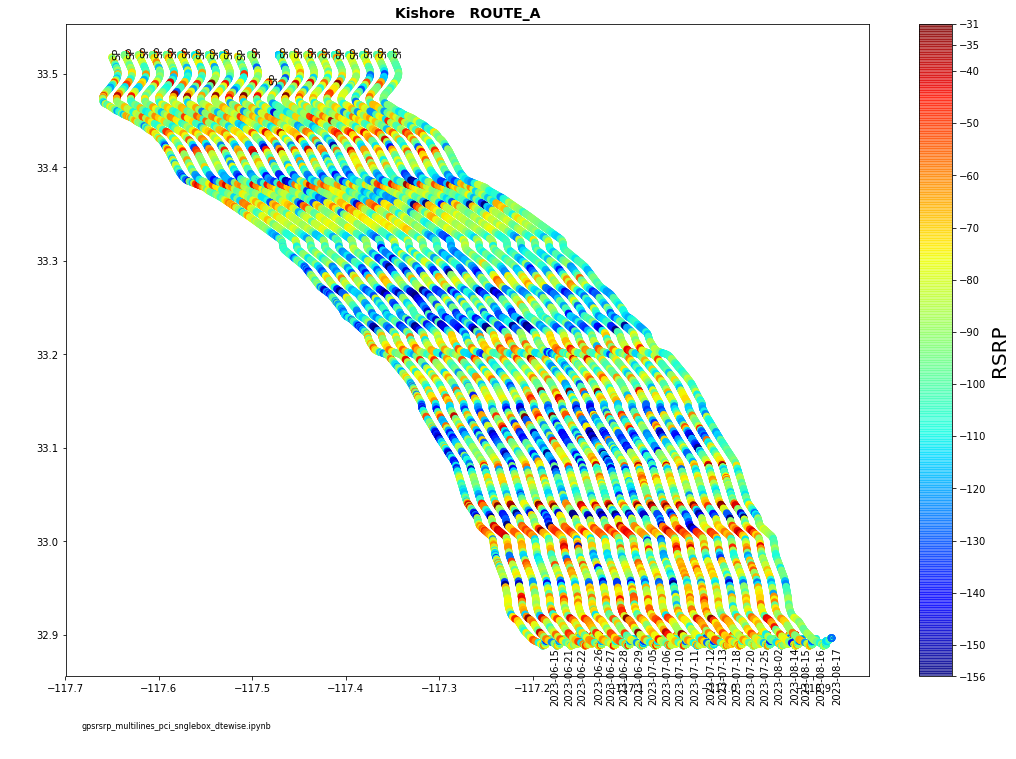

In [5]:
fig,ax = plt.subplots(figsize=(18,12))
ax.set_facecolor('white')

cnt = 0
for fle in sorted_fls:
    df = pd.read_csv(fle,low_memory=True)
    numcols = len(df.columns)
    #print("fname: {0}; no. of cloumns: {1}".format(fle, numcols))
    #display(df)
    #display(df.columns)
    rte = sroute
    chk = df['route'].iloc[0]
    if(chk == rte):
        cnt += 1
        date1 = fle.split("/")[-1]
        seldate = date1[28:38]
        print(fle,'  ',date1)
        val = cnt*0.015
        df["Lon"] = df['Lon'] + val
        #df["Lon"] = df['Lon'] 
        df.drop(["index","GPS","cputime","speed","altitude","date","time","index.1",
                "route","cellinfo","cputime.1","ncells","type","rsrq",
                "sinr","rssi","level","dcpu"], axis=1, inplace=True)
        #df = df[df['rsrp'] < -1000.]
        df = df[(df['rsrp'] >= -156.) & (df['rsrp'] <= -31.)]

        #differences between two rows
        df['pcidiff'] = df['pci'].diff()

        #finding the indices values of non-zero in python list
        data = df['pcidiff'].tolist()
        indcs = [idx for idx, val in enumerate(data) if val !=0]
        #print(indcs)
        #collecting the pci values corresponding indcs
        data1 = df["pci"].values
        pcivals = data1[indcs]
        pcivals = pcivals.astype(int)
        
        #display(df.iloc[100:120])
        #plt.xlim(-112.7,-112.0)
        xlon = len(df) // 2
    
        sc = ax.scatter(df['Lon'], df['Lat'], c=df['rsrp'], cmap='jet',  s=1.5, alpha=0.65, linewidths=6)
        ax.text(df['Lon'].iloc[-1], df["Lat"].iloc[-1]-0.018,str(seldate),rotation=90)   #A-0.0018; B=+0.062
        ax.text(df['Lon'].iloc[0], df['Lat'].iloc[0]+0.001,'SP',rotation=90)
        #for kk in range(len(indcs)):
            #j = indcs[kk]
            #ax.text(df['Lon'].iloc[j], df['Lat'].iloc[j],'_') 
            #ax.text(df['Lon'].iloc[j], df['Lat'].iloc[j],pcivals[kk],fontsize=8)
            
print(f"Route: {rte}  no. of files: {cnt}")
# Set the colorbar
cbar = plt.colorbar(sc,ticks=[-156,-150,-140,-130,-120,-110,-100,-90,-80,-70,-60,-50,-40,-35,-31])
cbar.set_label('RSRP',fontsize=20)
sc.set_clim(-156,-31.)  
# cbar.ax.set_yticklabels(np.arange(-140., -50.+15, 15), fontsize=14, weight='bold') 
tit = name + '   ' + rte
plt.title(tit,fontsize=14,weight='bold')
plt.annotate(prgname, xy=(0.08,0.04), xycoords='figure fraction', ha='left',color='black',fontsize=8)
plt.show()

#save image
outpath= "/local/mnt3/workspace3/Kishore/ML_project_dir/ML_project_env/data_folder/test/signal_prediction_plots/16Aug2023/"
vfname = outpath+name +'_'+rte+ '_RSRP_cell_gps_heatmaps_pcis_multi.png'
fig.savefig(vfname)